## SMS Spam Classifier 
* This dataset is a part of [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection).
* This dataset contain collections of messages labelled as **spam** and **ham**.
* The purpose of the project is to create a machine learning classifier to classify.

In [17]:
import pandas as pd 
import numpy as np
df = pd.read_csv('sms_spam.csv')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 1. Dataset Specification

In [18]:
# printing the shape of dataset. It has over 5k rows and 2 columns.
df.shape

(5574, 2)

In [19]:
# two type of sms's "ham" and "spam"
df.type.value_counts()

ham     4827
spam     747
Name: type, dtype: int64

In [20]:
spam_percent = (len(df[df.type == 'spam'])/len(df))*100
ham_percent = (len(df[df.type=='ham'])/len(df))*100
print("The dataset has {0:.2f}% spam and {1:.2f}% of ham.".format(spam_percent,ham_percent))

The dataset has 13.40% spam and 86.60% of ham.


* It could be observed that the dataset is **highly skewed**.Biased towards one label.

In [21]:
df.text[:10]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: text, dtype: object

### 2. Dataset Preprocessing

In [26]:
# putting labels 1 for spam and 0 for ham
df['label'] = df['type'].map(lambda x : 1 if x=='spam' else 0)
df.label.value_counts()

0    4827
1     747
Name: label, dtype: int64

In [27]:
#droping the "type" column
df.drop('type', axis=1, inplace=True)

### 3. Making train-test split

In [28]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['label'], 
                                                    random_state=0)

In [29]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)
print('\n\nX_train shape: ', X_test.shape)

X_train first entry:

 The whole car appreciated the last two! Dad and are having a map reading semi argument but apart from that things are going ok. P.


X_train shape:  (4180,)


X_train shape:  (1394,)


* It is basically a **75-25 %** split. 75% goes to training set & 25% test set.

* Before training our model we need to preprocess certain features from our dataset. One of them being the ''uppercase-lowercase'' issue, frequency count of words in a spam or ham, and the distribution of important words ignoring words like "the" , "a" ,"an" etc.



* For that we use an approach known as **bag of word** approach. The bag of words approach is commonly used way to represent text for use in machine learning which ignores structures and only counts how often each word occurs . It allows us to use bags of words approach by converting a collections of text document into matrix of token count.



* Sklearn has a method known as **CountVectorisor**. Fitting the count vectorisor consist of the tokenisation of the trained data and building of the vocabulary. It fits by finding all sequnces of characters of atleast two letters or numbers separated by word boundaries.Convert everything to lowercase and builds a vocabulary using these tokens. 


* The result of CountVectorisor is a **high dimensional sparse matrix** containing count of each word in the dataset stored in a  compressed row format.

### Using CountVectoriser

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [32]:
vect.get_feature_names()[::1000]

['00', 'areyouunique', 'crowd', 'gently', 'lion', 'petey', 'sittin', 'uworld']

In [33]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<4180x7490 sparse matrix of type '<class 'numpy.int64'>'
	with 55394 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9345550407141154


In [36]:
from sklearn.metrics import classification_report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1198
          1       0.98      0.87      0.92       196

avg / total       0.98      0.98      0.98      1394



TP 171
TN 1194
FP 4
FN 25


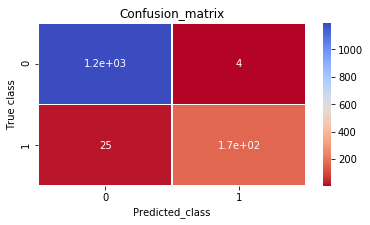

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

cnf_matrix=confusion_matrix(y_test,predictions)
fig= plt.figure(figsize=(6,3))
print("TP",cnf_matrix[1,1,]) # TP denotes True Positive
print("TN",cnf_matrix[0,0]) # TN denotes True Negative
print("FP",cnf_matrix[0,1]) # FP denotes False Positive
print("FN",cnf_matrix[1,0]) # FN denotes False Negative
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("True class")
plt.show()   

In [37]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['me' 'gt' 'my' 'lt' 'll' 'what' 'then' 'but' 'da' 'good']

Largest Coefs: 
['txt' 'text' 'uk' 'call' 'won' 'free' 'ringtone' 'reply' 'mobile' 'new']


### Using TF-IDF Vectorisor

* The term frequency inverse document frequency allows us to weight terms based on how important they are to the document.

* High weight is given to terms that appear often in a particular document but doesn't appear often in the corpus. Features with low TF-IDF are either commonly used across all document or rarely used and only in long document.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

1469

In [40]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8941560764539539


In [41]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1198
          1       0.98      0.79      0.88       196

avg / total       0.97      0.97      0.97      1394



In [42]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['norm150p' '36504' 'w45wq' 'hg' 'rays' 'ended' 'moral' '08000930705'
 'camcorder' 'cr9']

Largest tfidf: 
['nite' 'of' 'babe' 'today' 'home' 'too' 'type' 'alrite' 'for' 'anytime']


In [43]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['me' 'my' 'ok' 'gt' 'that' 'lt' 'll' 'can' 'how' 'what']

Largest Coefs: 
['txt' 'call' 'text' 'free' 'mobile' 'to' 'uk' 'www' 'stop' 'claim']


### Using TF-IDF with N-grams

* It adds sequences of word features known as bigrams , which count pair of adjacent words could be given as features like working versus not working . A trigrams which gives us triplets of adjacent words .

In [44]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

2863

In [45]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9320040203059521


In [46]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1198
          1       0.98      0.87      0.92       196

avg / total       0.98      0.98      0.98      1394



In [47]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['me' 'my' 'gt' 'lt' 'll' 'lt gt' 'then' 'what' 'da' 'he']

Largest Coefs: 
['txt' 'text' 'free' 'uk' 'you have' 'reply' 'call' 'won' 'ringtone'
 'claim']
